In [2]:
raw = """Reading Period [us]	Rate [Hz]	Unfiltered	Peak Detection 1	Peak Detection 2
2000000	0.5	0	0	0
1250000	0.8	0	0	0
1000000	1	0	0	0
500000	2	4	10	18
250000	4	11	11	19
125000	8	17	15	23
62500	16	22	24	25
31250	32	24	24	25
15625	64	25	25	25"""

In [3]:
data = []
for line in raw.split("\n"):
    data.append(line.split("	"))
data

[['Reading Period [us]',
  'Rate [Hz]',
  'Unfiltered',
  'Peak Detection 1',
  'Peak Detection 2'],
 ['2000000', '0.5', '0', '0', '0'],
 ['1250000', '0.8', '0', '0', '0'],
 ['1000000', '1', '0', '0', '0'],
 ['500000', '2', '4', '10', '18'],
 ['250000', '4', '11', '11', '19'],
 ['125000', '8', '17', '15', '23'],
 ['62500', '16', '22', '24', '25'],
 ['31250', '32', '24', '24', '25'],
 ['15625', '64', '25', '25', '25']]

In [4]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.DataFrame(data[1:], columns=data[0])
for col in df.columns:
    df[col] = df[col].astype(float)
df


,Reading Period [us],Rate [Hz],Unfiltered,Peak Detection 1,Peak Detection 2
0,2000000.0,0.5,0.0,0.0,0.0
1,1250000.0,0.8,0.0,0.0,0.0
2,1000000.0,1.0,0.0,0.0,0.0
3,500000.0,2.0,4.0,10.0,18.0
4,250000.0,4.0,11.0,11.0,19.0
5,125000.0,8.0,17.0,15.0,23.0
6,62500.0,16.0,22.0,24.0,25.0
7,31250.0,32.0,24.0,24.0,25.0
8,15625.0,64.0,25.0,25.0,25.0


In [6]:
cols = df.columns[[0,2,3,4]]
heat_data = np.array(df[cols])


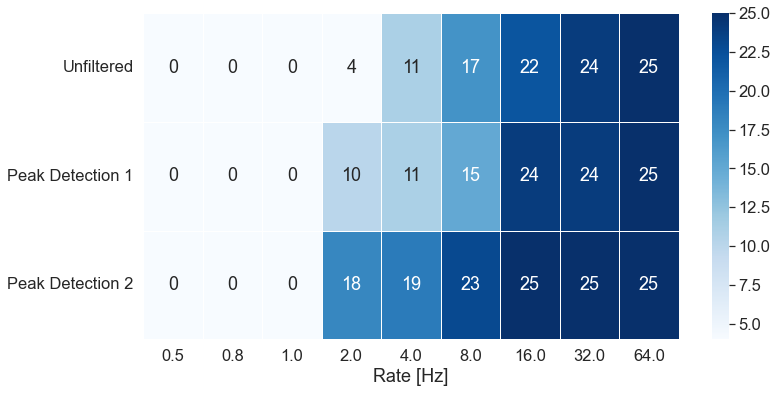

In [9]:
cols = df.columns[[2,3,4]]
heat_data = df[cols].transpose()
scale = 1.5

fig = plt.figure(figsize=(12,6))
ax = fig.subplots(nrows=1, ncols=1)
sn.set(font_scale=scale)  # Label size
sn.heatmap(heat_data, ax=ax,
annot=True, fmt=".0f", annot_kws={"size": scale*12},
cmap='Blues',
vmin=4,
# vmax=1,
# xticklabels=cols,
xticklabels=df[df.columns[1]],
# square=True,
linewidths=0.5)
ax.set_xlabel(df.columns[1])
plt.savefig("temp.jpg", bbox_inches="tight")
